In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
titanic_train = pd.read_csv(r"/Users/mrinalhinduja/Desktop/Data science_2019/Titanic/train.csv")

In [4]:
titanic_test = pd.read_csv(r'/Users/mrinalhinduja/Desktop/Data science_2019/Titanic/test.csv')

#### Exploratory Data Analysis (EDA)

In [5]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Cleaning the dataset

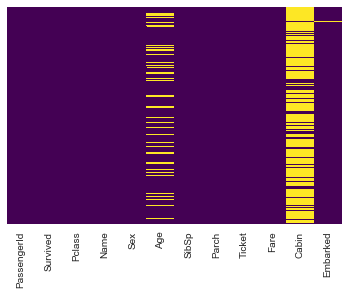

In [9]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

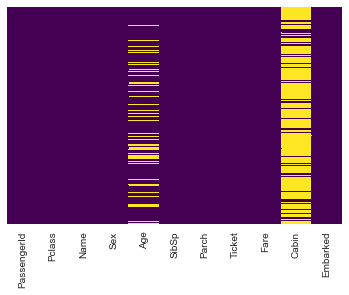

In [10]:
sns.heatmap(titanic_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age, axis=1)

In [13]:
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(impute_age, axis=1)

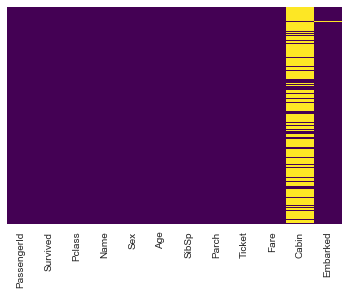

In [14]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

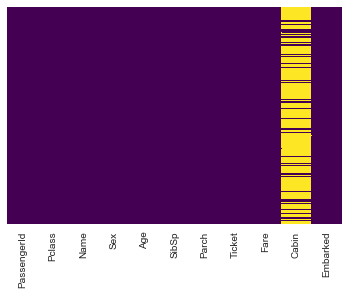

In [15]:
sns.heatmap(titanic_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
titanic_train.drop('Cabin', axis=1, inplace=True)

In [17]:
titanic_test.drop('Cabin', axis=1, inplace=True)

In [18]:
titanic_train.dropna(inplace=True)

In [16]:
# do imputtion technique here

In [17]:
titanic_test.dropna(inplace=True)

In [18]:
# do imputtion technique here

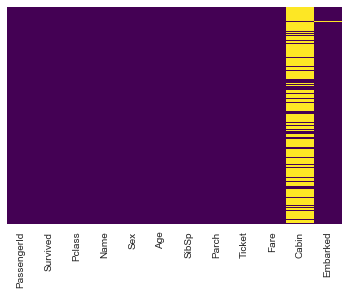

In [19]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

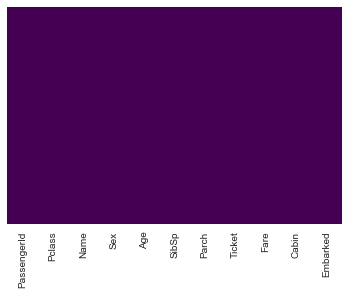

In [20]:
sns.heatmap(titanic_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'], drop_first=True)

In [23]:
titanic_train = pd.concat([titanic_train,sex,embark],axis=1)

In [24]:
titanic_train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [25]:
titanic_train.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.25,NaN,1,0,1


In [26]:
sex = pd.get_dummies(titanic_test['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_test['Embarked'], drop_first=True)

In [27]:
titanic_test = pd.concat([titanic_test,sex,embark],axis=1)

In [28]:
titanic_test.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [29]:
titanic_test.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
12,904,1,23.0,1,0,82.2667,B45,0,0,1


#### Creating the Model using Training Data

In [30]:
X = titanic_train[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
y = titanic_train['Survived']

In [31]:
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#### Scale the Features

In [34]:
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

In [35]:
X_std.shape

(889, 8)

In [36]:
logmodel = LogisticRegression()

In [37]:
logmodel.fit(X_std, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#### Cross Validation within Train Data

In [39]:
res = cross_val_score(logmodel, X_std, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.7998
Accuracy SD: 		 0.0215


In [40]:
y_train_pred = cross_val_predict(logmodel, X_std, y, cv=3)

In [41]:
confusion_matrix(y, y_train_pred)

array([[475,  74],
       [104, 236]], dtype=int64)

In [42]:
print("Precision Score: \t {0:.4f}".format(precision_score(y, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.7978
Recall Score: 		 0.7998
F1 Score: 		 0.7978


#### Kaggle Submission

In [43]:
X_test = titanic_test.drop('PassengerId',axis=1)

In [44]:
X_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1


In [45]:
y_pred = logmodel.predict(X_test)

In [46]:
submission = pd.DataFrame(
    {
        'PassengerId': titanic_test["PassengerId"], 
        'Survived': y_pred
    },
    columns = ['PassengerId', 'Survived'])
submission.to_csv('submission.csv', index = False)

In [47]:
submission['Survived'].value_counts()

0    409
1      8
Name: Survived, dtype: int64